## Assignment explanation:  
I tried in two ways. One is to define the euler function directly, and the other is to use the functions stored in the Python 'odeint' module. Each simulation(1~3) situation was reproduced using both methods(euler, odeint). In the model using the odeint, the result was good, whereas in the euler function, I don't know how to set the x-axis by time. I wanted to ask question about how to set the x-axis by time, so I put it in the assignment together...! (actually, the answer is 'odeint' used one.)    
Thankyou.

In [1]:
#numpy import for array
import numpy as np

# matplotlib import for graph
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# define euler function
def euler(f, y0, dt, t, IabcE):
    """
    f: righthand side of ODE dy/dt=f(y,t)
    y0: initial condition y(0)=y0
    dt: time step
    t: time
    IabcE: array of [I,a,b,c,E]
    """
    d = np.array([y0]).size ## state dimension
    n=int(t/dt) #iterations
    y = np.zeros((n+1,d))
    y[0] = y0 #initial value
    
    #approximate next(t+h) value
    for k in range(n):
        y[k+1] = y[k] + f(y[k], t,IabcE)*dt
        t = t + dt
    return(y)

In [5]:
#define function of dx_dt, dy_dt, dz_dt
def dxdydz(c,t,IabcE):  #IabcE: list of [I,a,b,c,E]
    (x,y,z)=c #xyz value
    return np.array([IabcE[0]-IabcE[1]*IabcE[4]*x,IabcE[1]*IabcE[4]*x-IabcE[2]*y,IabcE[2]*y-IabcE[3]*z]) #caculate dx, dy, dz

# Initial condition 1

In [12]:
#set the model's initial condition and parameters
y0=np.array([0,0,0]) #[X,Y,Z] #initial value
params=np.array([1,1.5,1.5,1.5,1]) #[I,a,b,c,E] #parameter

### Using euler function

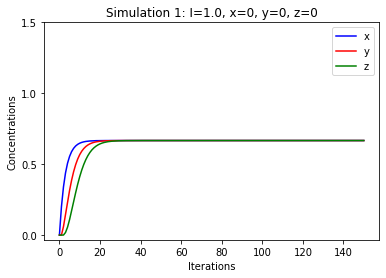

In [14]:
y=euler(dxdydz,y0,0.2,30,params) #execute function
#graph
plt.plot(y[:,0],label='x',color='b') #x plot
plt.plot(y[:,1],label='y',color='r') #y plot
plt.plot(y[:,2],label='z',color='g') #z plot

#plot informations
plt.xlabel("Iterations")
plt.ylabel("Concentrations")
plt.title(f"Simulation 1: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}") #title is determined by the initial value
plt.yticks(np.arange(0,2.0,0.5)) #a range of y axis
plt.legend()

### Using odeint module

In [15]:
from scipy.integrate import odeint #odeint import

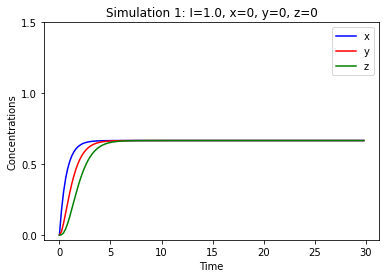

In [16]:
t=np.arange(0,30,0.2) #set the time range
y=odeint(dxdydz,y0,t,args=(params,)) #execute odeint function

#plot
plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

#plot information
plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(f"Simulation 1: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,2.0,0.5))
plt.legend()

# Initial condition 2

In [28]:
#set the model's initial condition and parameters
y0=np.array([1,1,1]) #[X,Y,Z] #initial value
params=np.array([0.75,1.4,1.4,1.4,1]) #[I,a,b,c,E] #s2 parameter 

#these two parameters was tested to see how the graph change
#params=np.array([0.75,1,1,1,1]) #[I,a,b,c,E] #parameter
#params=np.array([0.75,0.8,0.8,0.8,1]) #[I,a,b,c,E] #parameter

### Using euler function

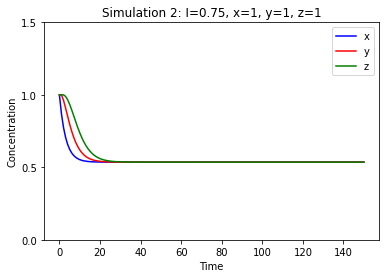

In [23]:
y=euler(dxdydz,y0,0.2,30,params)

#graph
plt.plot(y[:,0],label='x',color='b')
plt.plot(y[:,1],label='y',color='r')
plt.plot(y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Simulation 2: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,2.0,0.5))
plt.legend()

### Using odeint module

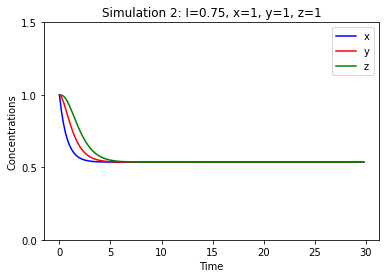

In [29]:
t=np.arange(0,30,0.2)
y=odeint(dxdydz,y0,t,args=(params,))

plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentrations")
plt.title(f"Simulation 2: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,2.0,0.5))
plt.legend()

# Initial condition 3

In [25]:
#set the model's initial condition and parameters
y0=np.array([1,1,1]) #[X,Y,Z] #initial value
params=np.array([0.75,1.4,0.7,0.7,1]) #[I,a,b,c,E] #parameter

### Using euler function

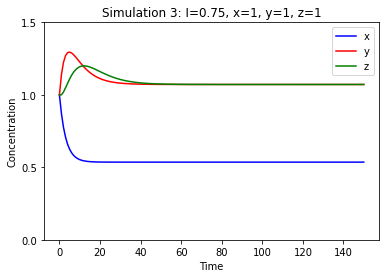

In [26]:
y=euler(dxdydz,y0,0.2,30,params)
#graph

plt.plot(y[:,0],label='x',color='b')
plt.plot(y[:,1],label='y',color='r')
plt.plot(y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Simulation 3: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,2.0,0.5))
plt.legend()

### Using odeint module

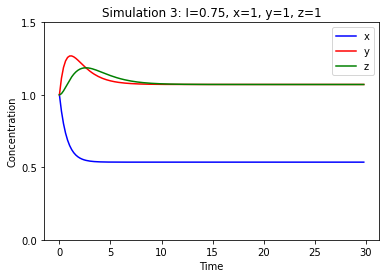

In [27]:
t=np.arange(0,30,0.2)
y=odeint(dxdydz,y0,t,args=(params,))

plt.plot(t,y[:,0],label='x',color='b')
plt.plot(t,y[:,1],label='y',color='r')
plt.plot(t,y[:,2],label='z',color='g')

plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title(f"Simulation 3: I={params[0]}, x={y0[0]}, y={y0[1]}, z={y0[2]}")
plt.yticks(np.arange(0,1.6,0.5))
plt.legend()